In [1]:
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk

path_to_json = r'C:\Users\Howoo\Data_analysis\fomc_minutes_json'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

['20120125.htm.json', '20120313.htm.json', '20120425.htm.json', '20120620.htm.json', '20120801.htm.json', '20120913.htm.json', '20121024.htm.json', '20121212.htm.json', '20130130.htm.json', '20130320.htm.json', '20130501.htm.json', '20130619.htm.json', '20130731.htm.json', '20130918.htm.json', '20131030.htm.json', '20131218.htm.json', '20140129.htm.json', '20140319.htm.json', '20140430.htm.json', '20140618.htm.json', '20140730.htm.json', '20140917.htm.json', '20141029.htm.json', '20141217.htm.json', '20150128.htm.json', '20150318.htm.json', '20150429.htm.json', '20150617.htm.json', '20150729.htm.json', '20150917.htm.json', '20151028.htm.json', '20151216.htm.json', '20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json', '20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.ht

In [2]:
from pathlib import Path
import json

data_folder = Path(r'C:\Users\Howoo\Data_analysis\fomc_minutes_json')
file_to_open = data_folder / "20210728.htm.json"

f = open(file_to_open)
data = json.load(f)

In [3]:
data.keys()

dict_keys(['July 27-28, 2021', 'Developments in Financial Markets and Open Market Operations', 'Establishment of Standing Repurchase Agreement Facilities', 'Standing FIMA Repurchase Agreement Resolution', 'Discussion of Asset Purchases', 'Staff Review of the Economic Situation', 'Staff Review of the Financial Situation', 'Staff Economic Outlook', "Participants' Views on Current Economic Conditions and the Economic Outlook", 'Committee Policy Action', 'Voting against this action: ', '_______________________'])

In [4]:
a = data['Staff Review of the Economic Situation']

In [5]:
b = data['Staff Review of the Financial Situation']

In [6]:
c = data['Staff Economic Outlook']

In [7]:
d = data["Participants' Views on Current Economic Conditions and the Economic Outlook"]

In [8]:
a.extend(b+c+d)

In [9]:
a

["Total nonfarm payroll employment rose sharply in June, with job gains widespread across industries and especially strong job growth in the leisure and hospitality sector. As of June, total payroll employment had retraced more than two-thirds of the losses seen at the onset of the pandemic. The unemployment rate edged higher and stood at 5.9 percent in June, and the unemployment rates for African Americans and Hispanics remained well above the national average. The labor force participation rate and employment-to-population ratio were unchanged in June. May private-sector job openings, as measured by the Job Openings and Labor Turnover Survey, remained at the highest recorded level since the survey's inception in 2000. Initial claims for regular state unemployment insurance were little changed, on net, since mid-June. Weekly estimates of private-sector payrolls constructed by Federal Reserve Board staff using data provided by the payroll processor ADP that were available through the f

In [10]:
str1 = ''.join(a)
print(str1)

Total nonfarm payroll employment rose sharply in June, with job gains widespread across industries and especially strong job growth in the leisure and hospitality sector. As of June, total payroll employment had retraced more than two-thirds of the losses seen at the onset of the pandemic. The unemployment rate edged higher and stood at 5.9 percent in June, and the unemployment rates for African Americans and Hispanics remained well above the national average. The labor force participation rate and employment-to-population ratio were unchanged in June. May private-sector job openings, as measured by the Job Openings and Labor Turnover Survey, remained at the highest recorded level since the survey's inception in 2000. Initial claims for regular state unemployment insurance were little changed, on net, since mid-June. Weekly estimates of private-sector payrolls constructed by Federal Reserve Board staff using data provided by the payroll processor ADP that were available through the fir

In [11]:
def bigrams(text):
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend(["governors", "board", "federal", "reserve"])
    words =[word.lower() for word in words if word.isalpha() if word not in stopwords]
    bigrams = nltk.collocations.BigramAssocMeasures()
    bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(words)
    bigram_freq = bigramFinder.ngram_fd.items()
    bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    
    return bigramFreqTable

staff_review_econ = ''.join(data['Staff Review of the Economic Situation'])
staff_review_financial = ''.join(data['Staff Review of the Financial Situation'])
staff_econ_outlook = ''.join(data['Staff Economic Outlook'])
participants_views = ''.join(data["Participants' Views on Current Economic Conditions and the Economic Outlook"])

df_staff_review_econ = bigrams(staff_review_econ)
df_staff_review_financial = bigrams(staff_review_financial)
df_staff_econ_outlook = bigrams(staff_econ_outlook)
df_participants_views = bigrams(participants_views)

In [12]:
import nltk
from pprint import pprint
import string
import pandas as pd

words = nltk.word_tokenize(str1)
stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(["governors", "board", "federal", "reserve"])
words =[word.lower() for word in words if word.isalpha() if word not in stopwords]

# Check most frequently addressed words
fd = nltk.FreqDist(words)
fd.tabulate(10)

bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()

bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(words)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(words)
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
bigramFreqTable.head(20).reset_index(drop=True)

trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
trigramFreqTable.head(20).reset_index(drop=True)

participants    inflation     remained    committee        labor    continued        would          the       supply        risks 
          55           53           37           27           25           25           22           20           20           20 


,trigram,freq
0,"(pace, asset, purchases)",6
1,"(pce, price, inflation)",5
2,"(c, i, loans)",5
3,"(labor, market, conditions)",4
4,"(several, participants, also)",3
5,"(constructed, federal, reserve)",3
6,"(risks, financial, stability)",3
7,"(production, bottlenecks, supply)",3
8,"(bottlenecks, supply, constraints)",3
9,"(asset, purchases, would)",3


In [13]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df

,lab,val
0,A,10
1,B,30
2,C,20


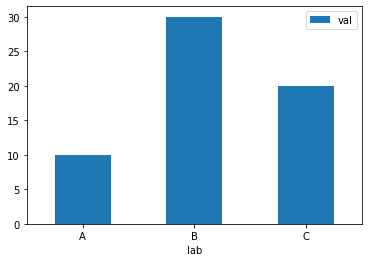

In [14]:
ax = df.plot.bar(x='lab', y='val', rot=0)

In [15]:
df = bigramFreqTable.head(20).reset_index(drop=True)
df

,bigram,freq
0,"(asset, purchases)",13
1,"(second, quarter)",13
2,"(labor, market)",11
3,"(several, participants)",11
4,"(intermeeting, period)",10
5,"(participants, noted)",9
6,"(inflation, expectations)",8
7,"(basis, points)",7
8,"(monetary, policy)",7
9,"(progress, toward)",7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '(asset, purchases)'),
  Text(1, 0, '(second, quarter)'),
  Text(2, 0, '(labor, market)'),
  Text(3, 0, '(several, participants)'),
  Text(4, 0, '(intermeeting, period)'),
  Text(5, 0, '(participants, noted)'),
  Text(6, 0, '(inflation, expectations)'),
  Text(7, 0, '(basis, points)'),
  Text(8, 0, '(monetary, policy)'),
  Text(9, 0, '(progress, toward)'),
  Text(10, 0, '(funds, rate)'),
  Text(11, 0, '(little, changed)'),
  Text(12, 0, '(pace, asset)'),
  Text(13, 0, '(july, sloos)'),
  Text(14, 0, '(some, participants)'),
  Text(15, 0, '(supply, constraints)'),
  Text(16, 0, '(participants, remarked)'),
  Text(17, 0, '(in, addition)'),
  Text(18, 0, '(would, likely)'),
  Text(19, 0, '(risks, associated)')])

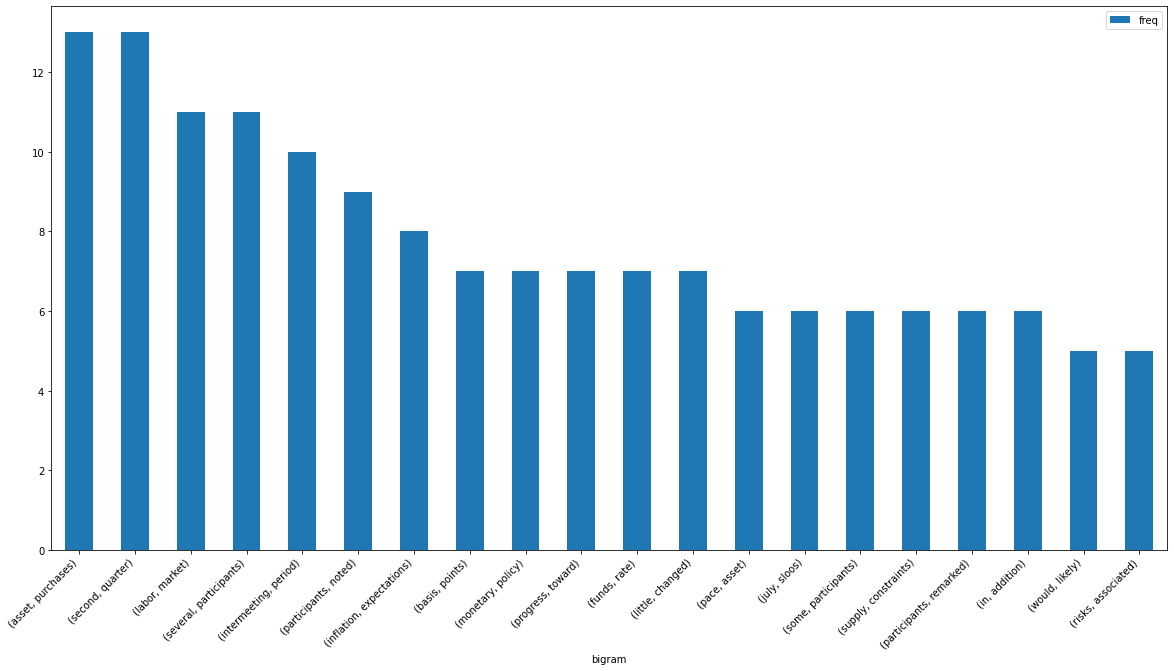

In [16]:
ax = df.plot.bar(x='bigram', y='freq', rot=0, figsize=(20,10))
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(labor, market)'),
  Text(1, 0, '(asset, purchases)'),
  Text(2, 0, '(several, participants)'),
  Text(3, 0, '(participants, noted)'),
  Text(4, 0, '(monetary, policy)')])

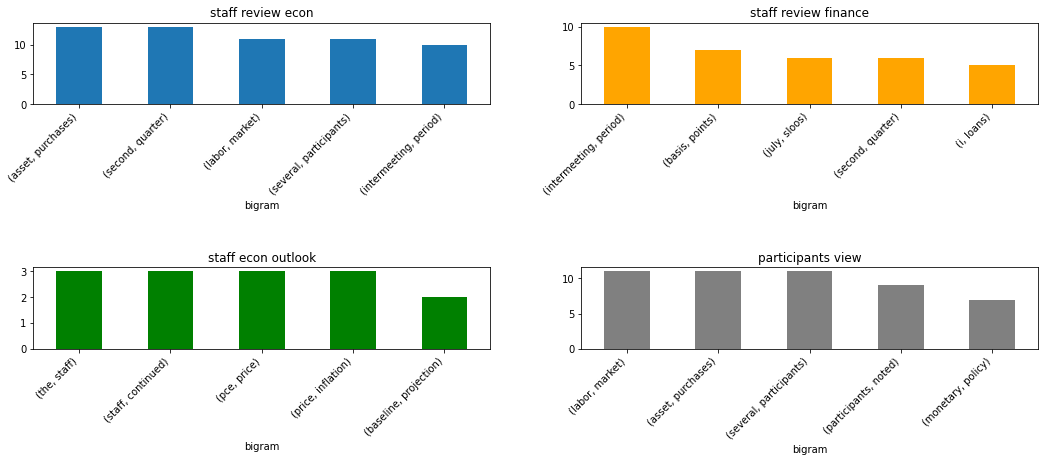

In [17]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
 
# initialize a figure
fig=plt.figure(figsize=(18, 6))
plt.subplots_adjust(hspace = 2)
 
# Do a 2x2 chart
ax1 = fig.add_subplot(221)
df_staff_review_econ.head(5).plot(x='bigram', y='freq', kind='bar', ax=ax1, legend=False).set_title('staff review econ')
plt.xticks(rotation=45, ha='right')

ax2 = fig.add_subplot(222)
df_staff_review_financial.head(5).plot(x='bigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('staff review finance')
plt.xticks(rotation=45, ha='right')

ax3 = fig.add_subplot(223)
df_staff_econ_outlook.head(5).plot(x='bigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('staff econ outlook')
plt.xticks(rotation=45, ha='right')

ax4 = fig.add_subplot(224)
df_participants_views.head(5).plot(x='bigram', y='freq', kind='bar', ax=ax4, legend=False, color="grey").set_title('participants view')
plt.xticks(rotation=45, ha='right')

In [18]:
df2 = trigramFreqTable.head(20).reset_index(drop=True)
df2

,trigram,freq
0,"(pace, asset, purchases)",6
1,"(pce, price, inflation)",5
2,"(c, i, loans)",5
3,"(labor, market, conditions)",4
4,"(several, participants, also)",3
5,"(constructed, federal, reserve)",3
6,"(risks, financial, stability)",3
7,"(production, bottlenecks, supply)",3
8,"(bottlenecks, supply, constraints)",3
9,"(asset, purchases, would)",3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '(pace, asset, purchases)'),
  Text(1, 0, '(pce, price, inflation)'),
  Text(2, 0, '(c, i, loans)'),
  Text(3, 0, '(labor, market, conditions)'),
  Text(4, 0, '(several, participants, also)'),
  Text(5, 0, '(constructed, federal, reserve)'),
  Text(6, 0, '(risks, financial, stability)'),
  Text(7, 0, '(production, bottlenecks, supply)'),
  Text(8, 0, '(bottlenecks, supply, constraints)'),
  Text(9, 0, '(asset, purchases, would)'),
  Text(10, 0, '(stance, monetary, policy)'),
  Text(11, 0, '(spread, delta, variant)'),
  Text(12, 0, '(committee, pace, asset)'),
  Text(13, 0, '(sloos, banks, reported)'),
  Text(14, 0, '(disruptions, labor, shortages)'),
  Text(15, 0, '(several, participants, emphasized)'),
  Text(16, 0, '(labor, force, participation)'),
  Text(17, 0, '(remained, relatively, tight)'),
  Text(18, 0, '(leisure, hospitality, sector)'),
  Text(19, 0, '(months, ending,

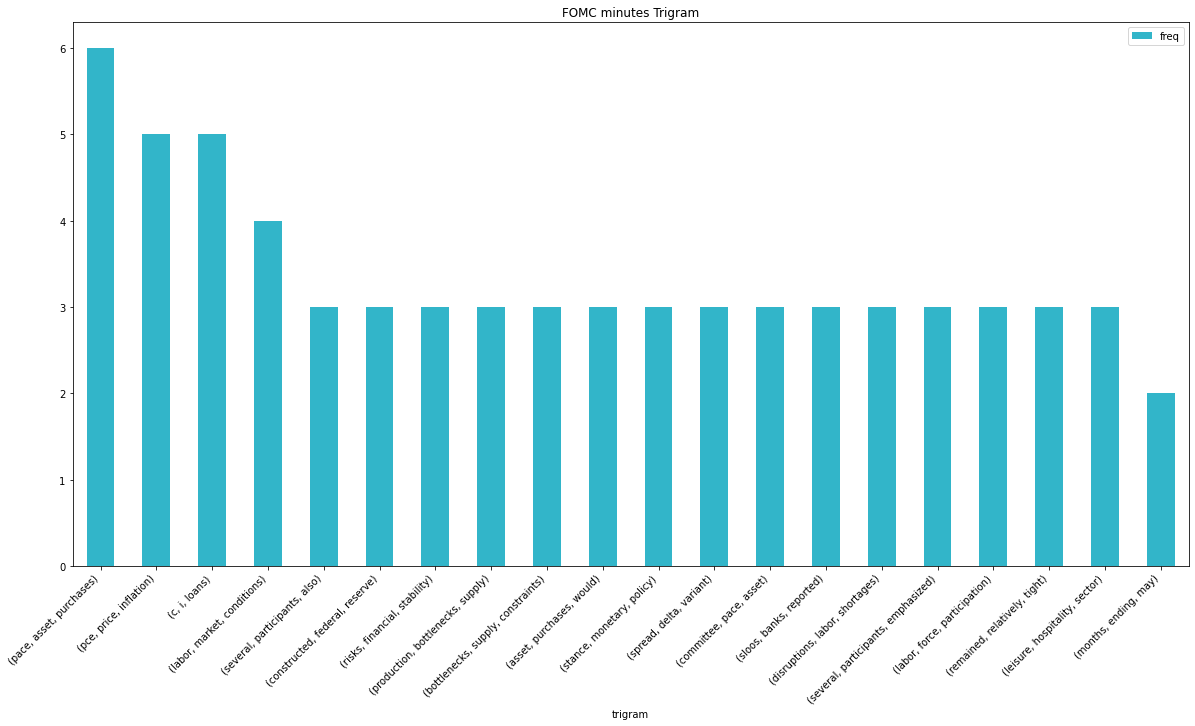

In [19]:
import matplotlib.pyplot as plt
ax2 = df2.plot.bar(x='trigram', y='freq', rot=0, figsize=(20,10), color='#32B5C9').set_title('FOMC minutes Trigram')
#glucose = df.glucose.hist(figsize=(7.2,4), bins=100).set_title('Glucose')
#glucose = df.glucose.hist(figsize=(7.2,4), grid=False).set_title('Glucose')
plt.xticks(rotation=45, ha='right')


"\nage = df.age.hist(ax=axes[0]).set_title('Age')\nglucose = df.glucose.hist(ax=axes[1]).set_title('Glucose')\noutcome = df.age.hist(ax=axes[2]).set_title('Diabetes')\n"

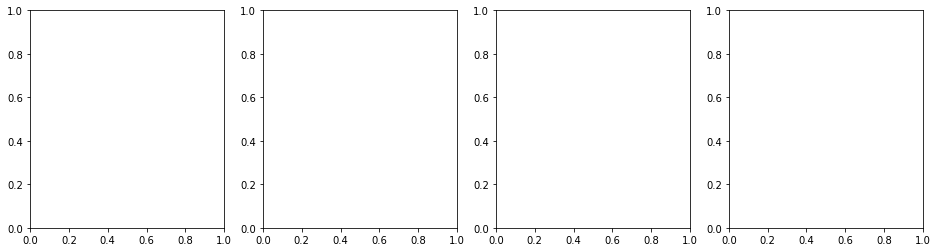

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
#fig, axes = plt.subplots(1, 4, figsize=(16,4))

"""
age = df.age.hist(ax=axes[0]).set_title('Age')
glucose = df.glucose.hist(ax=axes[1]).set_title('Glucose')
outcome = df.age.hist(ax=axes[2]).set_title('Diabetes')
"""

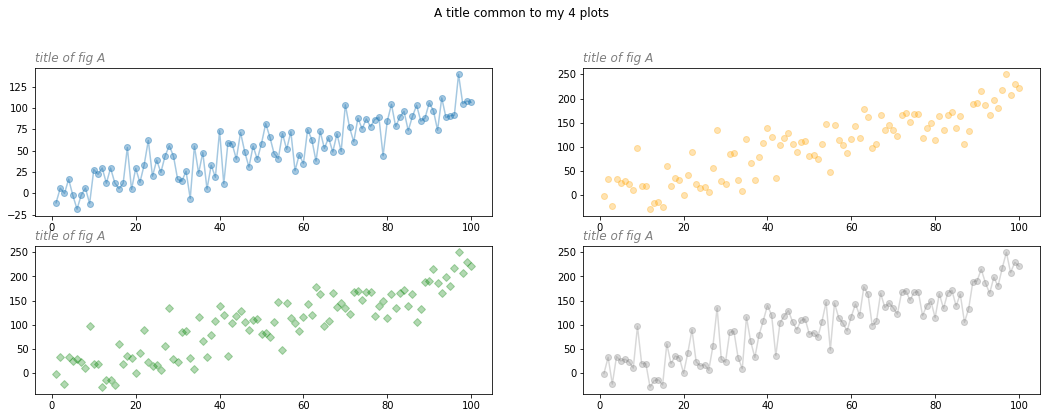

In [21]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*15+range(1,101), 'z_values': (np.random.randn(100)*15+range(1,101))*2 })
 
# initialize a figure
fig=plt.figure(figsize=(18, 6))
 
# Do a 2x2 chart
plt.subplot(221)
plt.plot( 'x_values', 'y_values', data=df, marker='o', alpha=0.4)
plt.title('title of fig A', fontsize=12, color='grey', loc='left', style='italic')
plt.subplot(222)
plt.plot( 'x_values','z_values', data=df, linestyle='none', marker='o', color="orange", alpha=0.3)
plt.title('title of fig A', fontsize=12, color='grey', loc='left', style='italic')
plt.subplot(223)
plt.plot( 'x_values','z_values', data=df, linestyle='none', marker='D', color="green", alpha=0.3)
plt.title('title of fig A', fontsize=12, color='grey', loc='left', style='italic')
plt.subplot(224)
plt.plot( 'x_values','z_values', data=df, marker='o', color="grey", alpha=0.3)
plt.title('title of fig A', fontsize=12, color='grey', loc='left', style='italic')
 
# Add a title:
plt.suptitle('A title common to my 4 plots', y=1.02)

# Show the graph
plt.show()

In [22]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [23]:
def trigrams(text):
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend(["governors", "board", "federal", "reserve"])
    words =[word.lower() for word in words if word.isalpha() if word not in stopwords]
    trigrams = nltk.collocations.TrigramAssocMeasures()
    trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(words)
    trigram_freq = trigramFinder.ngram_fd.items()
    trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
    
    return trigramFreqTable

staff_review_econ = ''.join(data['Staff Review of the Economic Situation'])
staff_review_financial = ''.join(data['Staff Review of the Financial Situation'])
staff_econ_outlook = ''.join(data['Staff Economic Outlook'])
participants_views = ''.join(data["Participants' Views on Current Economic Conditions and the Economic Outlook"])

df_staff_review_econ = trigrams(staff_review_econ)
df_staff_review_financial = trigrams(staff_review_financial)
df_staff_econ_outlook = trigrams(staff_econ_outlook)
df_participants_views = trigrams(participants_views)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(pace, asset, purchases)'),
  Text(1, 0, '(labor, market, conditions)'),
  Text(2, 0, '(disruptions, labor, shortages)'),
  Text(3, 0, '(asset, purchases, would)'),
  Text(4, 0, '(stance, monetary, policy)')])

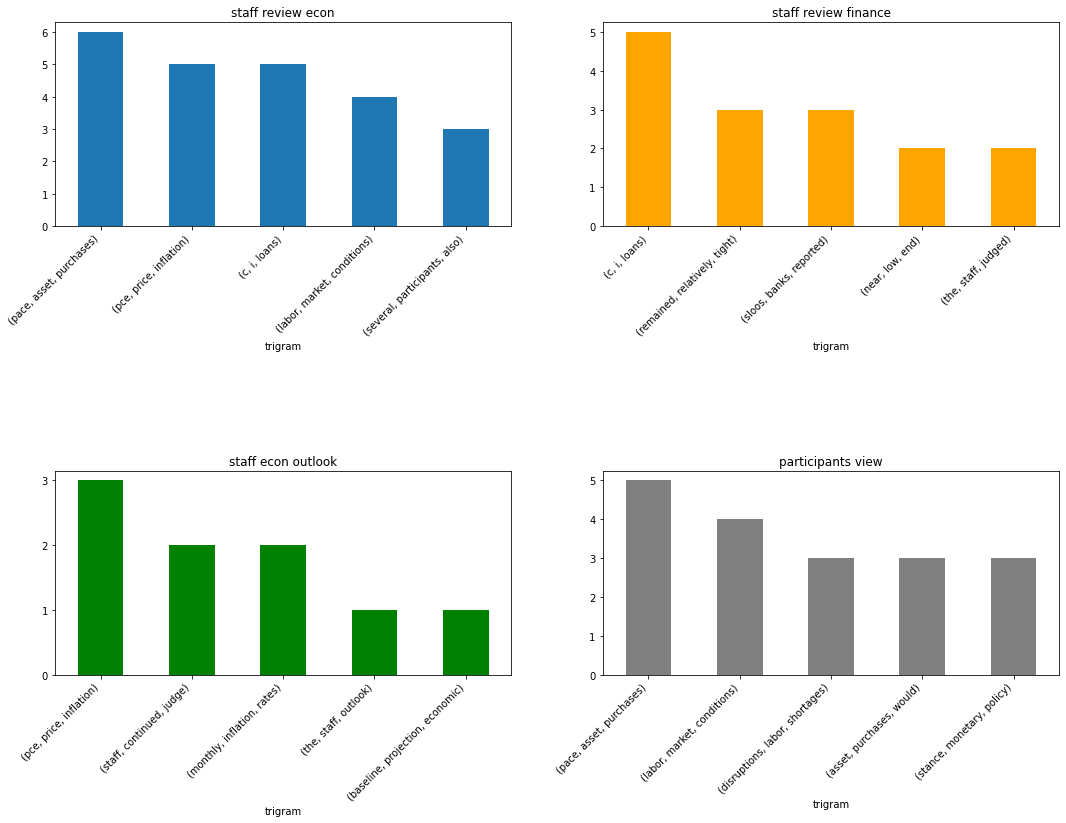

In [24]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np

# initialize a figure
fig=plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace = 1.2)
 
# Do a 2x2 chart
ax1 = fig.add_subplot(221)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
df_staff_review_econ.head(5).plot(x='trigram', y='freq', kind='bar', ax=ax1, legend=False).set_title('staff review econ')
plt.xticks(rotation=45, ha='right')

ax2 = fig.add_subplot(222)
df_staff_review_financial.head(5).plot(x='trigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('staff review finance')
plt.xticks(rotation=45, ha='right')

ax3 = fig.add_subplot(223)
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
df_staff_econ_outlook.head(5).plot(x='trigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('staff econ outlook')
plt.xticks(rotation=45, ha='right')

ax4 = fig.add_subplot(224)
df_participants_views.head(5).plot(x='trigram', y='freq', kind='bar', ax=ax4, legend=False, color="grey").set_title('participants view')
plt.xticks(rotation=45, ha='right')

In [33]:
>>> from nltk.sentiment import SentimentIntensityAnalyzer
>>> sia = SentimentIntensityAnalyzer()
>>> sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [34]:
tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]

In [35]:
from random import shuffle

def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0

shuffle(tweets)
for tweet in tweets[:10]:
    print(">", is_positive(tweet), tweet)

> True RT @NicolaSturgeon: If Miliband is going to let Tories in rather than work with SNP, we will definitely need lots of SNP MPs to protect Sco…
> False RT @MattChapmanUK: Shitty tweet from public service broadcaster "@BBCPolitics:Watch moment Ed Miliband stumbled as he left #bbcqt stage htt…
> False Still think it's barmy that Cameron won't debate Miliband. Surely it's a prerequisite of such proceedings. Should be compulsory! #bbcqt
> True So good @jon_bartley - heard loud and clear, we're against austerity and would not prop up a tory government https//t.co/zVWeQ3zL5T
> False Meet Steven @ the only kid who listens to me :( https//t.co/WL0Dtzg3J1
> False Bacon sandwiches for @KateWyvern &amp; @benjaminwyvern in the Marketing office, but I'm on pre-holiday diet boooo :( #meanies #deathbybaconsmell
> False RT @davies42g: @JimForScotland There is no "bluff" to be called ONLY #Labour 's .... are you saying no deals with #SNP Then blaming them fo…
> True RT @Conservatives: Ed Miliband w

In [32]:
positive_review_ids = nltk.corpus.movie_reviews.fileids(categories=["pos"])
negative_review_ids = nltk.corpus.movie_reviews.fileids(categories=["neg"])
all_review_ids = positive_review_ids + negative_review_ids

In [38]:
from statistics import mean

def is_positive(review_id: str) -> bool:
    """True if the average of all sentence compound scores is positive."""
    text = nltk.corpus.movie_reviews.raw(review_id)
    scores = [
        sia.polarity_scores(sentence)["compound"]
        for sentence in nltk.sent_tokenize(text)
    ]
    return mean(scores) > 0

In [39]:
>>> shuffle(all_review_ids)
>>> correct = 0
>>> for review_id in all_review_ids:
...     if is_positive(review_id):
...         if review_id in positive_review_ids:
...             correct += 1
...     else:
...         if review_id in negative_review_ids:
...             correct += 1
...
>>> print(F"{correct / len(all_review_ids):.2%} correct")

64.00% correct


In [40]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
)]
negative_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
)]

In [41]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}

In [42]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

positive_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["pos"])
    if w.isalpha() and w not in unwanted
])
negative_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["neg"])
    if w.isalpha() and w not in unwanted
])

In [43]:
def extract_features(text):
    features = dict()
    wordcount = 0
    compound_scores = list()
    positive_scores = list()

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])

    # Adding 1 to the final compound score to always have positive numbers
    # since some classifiers you'll use later don't work with negative numbers.
    features["mean_compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["wordcount"] = wordcount

    return features

In [44]:
features = [
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
    for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
    for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

In [45]:
>>> # Use 1/4 of the set for training
>>> train_count = len(features) // 4
>>> shuffle(features)
>>> classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
>>> classifier.show_most_informative_features(10)
Most Informative Features
               wordcount = 2                 pos : neg    =      4.1 : 1.0
               wordcount = 3                 pos : neg    =      3.8 : 1.0
               wordcount = 0                 neg : pos    =      1.6 : 1.0
               wordcount = 1                 pos : neg    =      1.5 : 1.0
>>> nltk.classify.accuracy(classifier, features[train_count:])
0.668

SyntaxError: invalid syntax (Temp/ipykernel_26536/2719413051.py, line 6)

In [53]:
from textblob import TextBlob

testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
print(testimonial.sentiment)
#Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)
print(testimonial.sentiment.polarity)


Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)
0.39166666666666666


In [3]:
test_case = "Staff summarized research projects being conducted across the Federal Reserve System on the effects of changes in lending practices and household leverage on consumer spending in recent years. These projects provided a range of views regarding the size and importance of such effects. An analysis employing aggregate time-series data indicated that changes in income, household assets and liabilities, and credit availability can largely account for the movements in aggregate consumption seen since the mid-1990s; this finding suggests that changes in credit conditions may have been an important factor driving changes in the saving rate in recent years. A second analysis used data on borrowing, debt repayments, and other credit factors for individual borrowers; this study found that movements in leverage--resulting from voluntary loan repayments and from loan charge-offs--have had a substantial effect on the cash flow of many households over time, and thus presumably on their spending. However, a third study, which employed household-level data, suggested that movements in consumption before, during, and after the recession were driven primarily by employment, income, and net worth, leaving little variation to be explained by changes in leverage and credit availability."

In [56]:

testimonial = TextBlob(test_case)

In [57]:
print(testimonial.sentiment)

Sentiment(polarity=0.1072704081632653, subjectivity=0.3431122448979592)


In [59]:
testimonial.intensity

AttributeError: 'TextBlob' object has no attribute 'intensity'

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

In [4]:
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sentiment_analysis(test_case))

[{'label': 'POSITIVE', 'score': 0.9956421852111816}]


In [7]:
classifier = pipeline('sentiment-analysis')

results = classifier(["We are very happy to show you the 🤗 Transformers library.",
            "We hope you don't hate it."])
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309


In [14]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
#classifier = pipeline('sentiment-analysis')

results = classifier(brainard_speech)
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: NEGATIVE, with score: 0.9889
label: NEGATIVE, with score: 0.997
label: POSITIVE, with score: 0.9937
label: POSITIVE, with score: 0.9921
label: POSITIVE, with score: 0.9974
label: NEGATIVE, with score: 0.9958


In [10]:
"So, I expect inflation to decelerate, and pre-COVID inflation dynamics to return when COVID disruptions dissipate. But with Delta disrupting the rotation from goods to services and prolonging supply bottlenecks, it is uncertain just how fast and how much inflation will decelerate over the remainder of the year and into next year. Therefore, I am monitoring a few upside risks closely. First, while rent and owners' equivalent rent both rose a moderate 0.3 percent in the August CPI data, if housing services inflation moved up substantially more than expected, it could provide durable upward pressure on inflation. Second, there is a risk that goods prices may not decelerate and return to pre-COVID trends as is widely expected, for instance, if excess savings or disruptions to services result in persistently elevated goods demand. Third, I will be watching for any signs that wage gains are feeding into higher inflation more broadly, but the evidence so far suggests that wage gains are broadly in line with productivity growth, and the labor share of income remains low relative to historical levels. To date, high markups and non-wage input costs appear to be more notable contributors to inflation than wage pressures."

"So, I expect inflation to decelerate, and pre-COVID inflation dynamics to return when COVID disruptions dissipate. But with Delta disrupting the rotation from goods to services and prolonging supply bottlenecks, it is uncertain just how fast and how much inflation will decelerate over the remainder of the year and into next year. Therefore, I am monitoring a few upside risks closely. First, while rent and owners' equivalent rent both rose a moderate 0.3 percent in the August CPI data, if housing services inflation moved up substantially more than expected, it could provide durable upward pressure on inflation. Second, there is a risk that goods prices may not decelerate and return to pre-COVID trends as is widely expected, for instance, if excess savings or disruptions to services result in persistently elevated goods demand. Third, I will be watching for any signs that wage gains are feeding into higher inflation more broadly, but the evidence so far suggests that wage gains are broa